# Image Processing Notebook
This notebook will contain image processing techniques documented in the book **Image Processing and Aquisition using Python** by **Ravishankar Chityala**

### Imports

In [383]:
import numpy as np
from scipy import ndimage, misc
from skimage import feature
from scipy.misc.pilutil import Image
import scipy.misc
from skimage import filters
import matplotlib.pyplot as plt
import cv2
import png
from IPython.display import display, Math

# Chapter 4 Spatial Filters

## Mean Filter
An example of a linear filter is the mean filter. A funciton is linear if it obeys the property, where $f$ is some function
$$
f(x+y) = f(x) + f(y)
$$

### Uses of Mean Filter:
 * Removes noise
 * Enhances quality of image by brightening it
 
### Disadvantages
 * Edges get blurred

In [546]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [547]:
# Initialize the filter as a n x n array; normalize array by number of elements
n = 3
k = np.ones((n, n))/(n*n)

In [548]:
# Perform convolution
meanfiltered_array = scipy.ndimage.filters.convolve(image, k)

In [549]:
# Convert b from an array to an image
meanfiltered = Image.fromarray(meanfiltered_array)

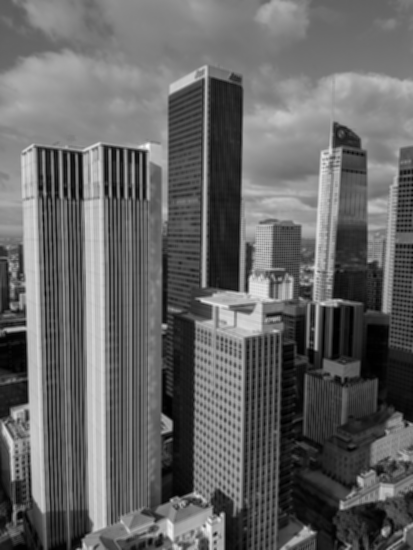

In [550]:
# Save the image
meanfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MeanFilter.png")
meanfiltered

## Median Filter
Functions that do not obey
$$
f(x+y) = f(x) + f(y)
$$
are non-linear. A sliding window is chosen and places on top of the image at position $(i, j)$. All the values under this sliding window are collected and their median is calculated and placed at position $(i, j)$.

### Uses of Median Filter
   * Used to remove salt and pepper noise
   * Removes impulse noise

In [551]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [552]:
# Perform median filter
medianfiltered_array = scipy.ndimage.filters.median_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

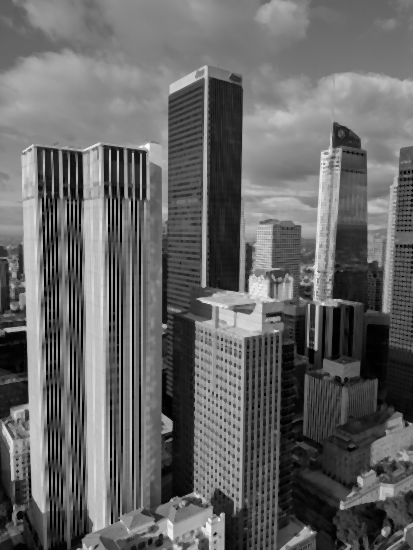

In [553]:
# Convert from array to image
medianfiltered= Image.fromarray(medianfiltered_array)
# Save the image
medianfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MedianFilter.png")
medianfiltered

## Max Filter
The max filter enhances bright points in an image. The maximum values in a sub-image at $(i, j)$

It can be seen in the output image that the buildings have been brightened.

### Uses of Max filter
   * Enhances bright points in an image 

In [554]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [555]:
# Perform the max filter
maxfiltered_array = scipy.ndimage.filters.maximum_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

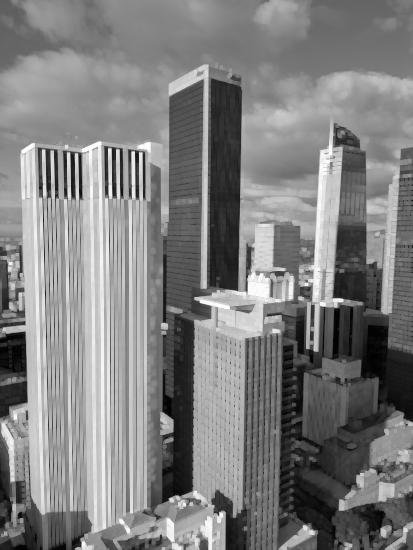

In [556]:
# Convert from array to image
maxfiltered = Image.fromarray(maxfiltered_array)
# Save the image
maxfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MaxFilter.png")
maxfiltered

## Min Filter
The min filter enhances dark points in an image. The minimum value of the sub-image replaces the value at $(i, j)$.


### Uses of Min filter
   * Enhances dark points in an image 

In [557]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [558]:
# Perform the min filter
minfiltered_array = scipy.ndimage.filters.minimum_filter(image, size = 3,
                                                   footprint = None,
                                                   output = None,
                                                   mode = 'reflect',
                                                   cval = 0.0, origin = 0)

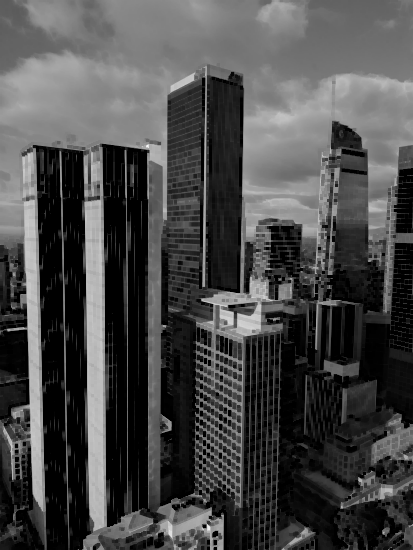

In [559]:
# Convert from array to image
minfiltered = Image.fromarray(minfiltered_array)
# Save the image
minfiltered.save("/Users/edenmolina/Documents/Image-Processing/Outputs/C4MinFilter.png")
minfiltered

## First Derivative Filters
An image is not a continuous function, rather each pixel is a discrete value. To bein talking about derivatives, we will look at the continuous case and extend it to discrete cases. The gradiaent of a coninuous function is given by
$$
\nabla f = \begin{bmatrix}
               f_x \\
               f_y
            \end{bmatrix}
$$
where $f_x = \frac{\partial f}{\partial x}$ which is the change of funciton $f$ with respect to variable $x$-in the horizantal position. The same is with $y$ for the verical direction.

The magnitude of the gradient, or size of the rate of chagne, is a scalar quantity and is given by
$$
\lvert \nabla f \rvert = [ (f_x)^2 + (f_y)^2 ]^{(\frac{1}{2})}
$$

which we can write as 
$$
\lvert \nabla f \rvert = \lvert f_x \rvert + \lvert f_y \rvert
$$
$$
\theta = \arctan \left( \frac{f_y}{f_x} \right)
$$

### Sobel Mask
A popular first derivative filter to find horizantal and vertical edges are given in by for horizantal edges

$$
\begin{bmatrix}
     -1 & -2 & -1 \\
     0 & 0 & 0 \\
     1 & 2 & 1 \\
\end{bmatrix}
$$

and for veritcal edges

$$
\begin{bmatrix}
     -1 & 0 & 1 \\
     -2 & 0 & 2 \\
     -1 & 0 & 1 \\
\end{bmatrix}
$$

#### Important Properties of Sobel Filter
   * Sum of coefficients in the mask is 0. The result of this is that pixels with constant greysacle are not affected by the derivative filter
   * Noise is created
   
### Prewitt Mask

#### Important Properties of Sobel Filter
   * Sum of coefficients in the mask is 0.
   * Filter does not reduce noise

## Sobel Filter

In [164]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


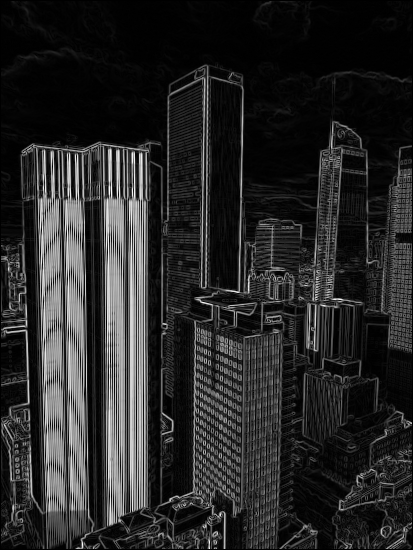

In [165]:
# Performing the Sobel Filter
sobelfiltered_array = filters.sobel(image)

# Convert array to image
sobelfiltered = scipy.misc.toimage(sobelfiltered_array)
sobelfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4SobelFilter.png')
sobelfiltered

## Prewitt Filter

In [166]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


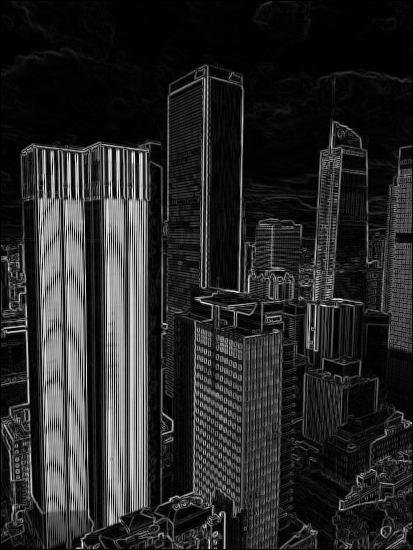

In [167]:
# Performing the Prewitt Filter
# prewittfiltered_array = ndimage.prewitt(image)
prewittfiltered_array = filters.prewitt(image)
# Convert array to image
# prewittfiltered = Image.fromarray(prewittfiltered_array)
prewittfiltered = scipy.misc.toimage(prewittfiltered_array)
prewittfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4PrewittFilter.png')
prewittfiltered

## Canny Filter
The Canny filter is an other popular filter for edge detection. This filter takes in $\sigma$, the standard devision of the Gaussian distribution, and threashold values, $t_1$ and $t_2$. A Gaussian filter used used to smooth the image.

A property of a pixel located on an edge is that it's gradient magnitude is at a maximum in the direction of the graduent. The magnitude of the gradiaent is given by

$$
\lvert \nabla f \rvert = \lvert f_x \rvert + \lvert f_y \rvert
$$
the corresponding diection of is given by 
$$
\theta = \arctan \left( \frac{f_y}{f_x} \right)
$$
at the edge points, the first derivative will have a minimum or maximum. What this entails is that the magnitude of the gradient of the image at the edges is a maximum. These pixels will be known as ridge pixels. The ridge tops will be retained and all other pixels will be assigned a value of zero to identity edge points and suppress all others. This process is known as non-maximal suppression.

The threasholds defined earlier, $t_1$ and $t_2$, are the low and high threashold. These are often known as ridge threasholds. The pixel values of the ridge pizels help classify edge pixels are 'weak' or 'strong'. Pixels whose values are higher than the high threashold will be classifed as edge pixels, whereas the redige pizels between the low and high threashold are known as weak edge points. The final se of the algorithm takes the weak edge pixels are 8-connected with strong edge pixels.

In [168]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [318]:
# Convert the image to an array
image_array = np.asarray(image)
# Perform Canny Image Filter
cannyfiltered_array = feature.canny(image_array, sigma = 1.0)
# Conver to image and save
cannyfiltered = png.from_array(cannyfiltered_array, 'L')
cannyfiltered.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4CannyFilter.png')

## Second Derivative Filters
### Laplacian
In this filter, the second erivative is computed in order to locate edges. The Laplacian is a popular method to determne edges. The Laplacian of a continuous function is defined as
$$
\nabla^2 f = \frac{\partial^2f}{\partial x^2} + \frac{\partial^2f}{\partial y^2}
$$

The discrete Laplacian in the discrete case has several forms. The most wildy used forms are
$$
\begin{bmatrix}
     0 & 1 & 0 \\
     -1 & 4 & -1 \\
     0 & -1 & 0 \\
\end{bmatrix}
$$

$$
\begin{bmatrix}
     -1 & -1 & -1 \\
     -1 & 8 & 1 \\
     -1 & -1 & -1 \\
\end{bmatrix}
$$

### Properties of Laplacian
   * Adds noise to the image 

In [183]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

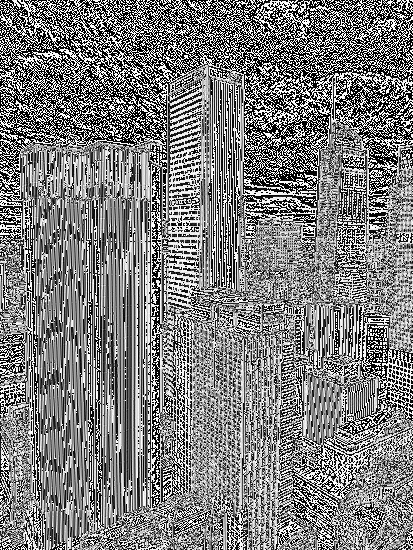

In [184]:
# Perform the Laplacian fiter; mode determines how padding the borders will take place
laplacianarray = scipy.ndimage.filters.laplace(image, mode = 'reflect')
# Convert from array to image
laplacian = Image.fromarray(laplacianarray)
laplacian.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4LaplacianFilter.png')
laplacian

## Gaussian Offset to the Laplacian
To offset the noise in the Laplacian, a smoothing function is used along with the Laplacian. The Gaussian smooths the noise induced by the second derivative. THe Gaussian filter is given by
    $$
    G(r) = -e^{\frac{-r^2}{2 \sigma^2}}
    $$
Where $r$ is $r^2 = x^2 + y^2$ and $\sigma$ is the standard deviation. The convolution of an image with the Gaussian will result in a smoothed image. The standard deviation, or width of the Gaussian, will determine the magnitude of the smoothing.

The convolution of the Laplacian with the Gaussian is known as the Laplacian of Gaussian which will be denoted by LoG. Because the Laplacian is an operator that operates on the Gaussian, we can determine LoG with respect to $r$ by
$$
\nabla^2 G(r) = - \left( \frac{r^2 - \sigma^2}{\sigma^4} e^{\frac{-r^2}{2 \sigma^2}} \right)
$$

The LoG mask or filter of size 5-by-5 is given by
$$
\begin{bmatrix}
     0 & 0 & -1 & 0 & 0 \\
     0 & -1 & -2 & -1 & 0 \\
     -1 & -2 & 16 & -2 & -1 \\
     0 & -1 & -2 & -1 & 0 \\
     0 & 0 & -1 & 0 & 0 \\
\end{bmatrix}
$$

The LoG is able to determine the edges in the images much more accurately than the Laplacian. However, the non-uniform nature of the background contrubutes to the formation of blobs-groups of conencted pixels.

### Disadvantage of LoG
   * Computational price as two operations
       * Gaussian followed by Laplacian
   * Oversegments the edges within the obected cauing closed loops (spaghetti effect)

In [185]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

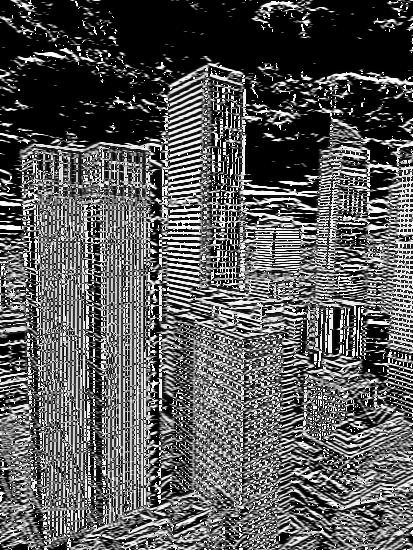

In [201]:
# perform the LoG
LoGarray = scipy.ndimage.filters.gaussian_laplace(image, sigma = 1, mode = 'reflect')
# Convert from array to image
LoG = Image.fromarray(LoGarray)
LoG.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C4LaplacianofGausianFilter.png')
LoG

# Chapter 5 Image Enhancement
This chapter will cover image enhancement techniques. These techniques will transform the pixel values in the input images to a new value using a mapping function.

## Simple Transformation

In [313]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [314]:
def transformation(array_value):
    transformedvalue = array_value/2
    try:
        return transformedvalue
    except:
        return 0
image = np.array([transformation(i) for i in image])

image = image.reshape((image.shape[0], image.shape[1])).astype(np.uint8)
image

transformed = png.fromarray(image, 'L')
transformed.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5Transformation.png')

## Image Inverse
The inverse of an image is an linear transform. The goal is to transform dark pixels to light pixels and vice versa. If the range of intensities of the original image is $[0, L-1]$, then the inverse transformation at point $(i, j)$ is given by
$$
t(i, j) = L-1-I(i, j)
$$
We can interpret thas as, the maximum value of the image $L-1$ minus the pixel value at position $(i, j)$.

In [329]:
# Open an image an convert to greyscale
image = Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L')

In [330]:
# Convert the image to an array
image_array = np.asarray(image)
# Perform the inversion
inversed_array = np.max(image_array) - image_array

In [331]:
# Convert the array to an image
inversed = Image.fromarray(inversed_array)

In [333]:
# Save to an image
inversed.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5Inverse.png')

## Power Law Transformation
The power law transformation is also known as the gamma-correction, is used to enhance the quality of an image. The power transformation at $(i, j)$ is given by
$$
t(i, j) = k I(i, j)^\gamma
$$
where $k$ and $\gamma$ are positive constants and $I$ is the intensity value of the pixel in the input image at position $(i, j)$. In most cakses $k=1$.

### Cases
#### $\gamma = 1$
   * In this case the mapping is linear and the output image is the same as the input image
   
#### $\gamma < 1$

   * A narrow range of low intensity pixel values in the input image gets mapped to a wide range of high intensity pixes. While a wide range of high intensity pixel values in the input image get mapped to narrow range in the output image
   
#### $\gamma > 1$
   * A narrow range of high intensity pixel values in the input image gets mapped to a wide range of low intensity pixes. While a wide range of low intensity pixel values in the input image get mapped to narrow range of high in the output image
   
### Facts
The human brain uses gamma-correction to process an image. Naturally, gamma-corection is a built-in feature in devices that display and aquire images.

We can see from the plot below how the transformation mapps low intensity values for $\gamma < 1$. Half the pixels lie below .71, while at $\gamma > 1$ half the pixels values lie at a narrower range, below .25.

Half the pixels at gamma = 1/2  lie below intensities: 0.71
Half the pixels at gamma = 2 lie below intensities:  0.25


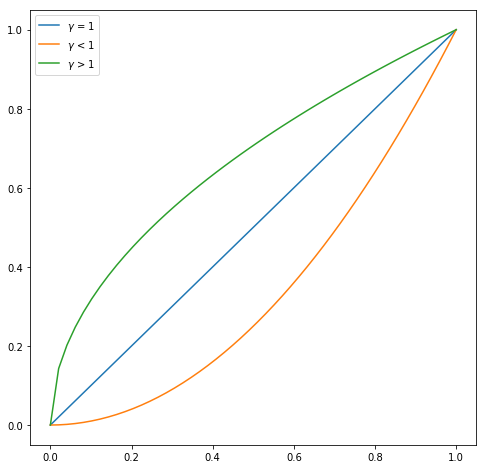

In [395]:
# Power Law Visualization
x = np.linspace(0, 1, 50)

def getPowerLawTransform(value, gamma, k = 1):
    return k*value**gamma

plt.figure(figsize = (8, 8))
plt.plot(x, [getPowerLawTransform(i, 1) for i in x], label = '$\gamma$ = 1')
plt.plot(x, [getPowerLawTransform(i, 2) for i in x], label = '$\gamma$ < 1')
plt.plot(x, [getPowerLawTransform(i, 1/2) for i in x], label = '$\gamma$ > 1')
plt.legend()

print ('Half the pixels at gamma = 1/2  lie below intensities:', round(np.percentile([getPowerLawTransform(i, 1/2) for i in x], 50), 2))
print ('Half the pixels at gamma = 2 lie below intensities: ', round(np.percentile([getPowerLawTransform(i, 2) for i in x], 50), 2))

For an 8-bit image, the range of values of the pixel values is bounded by $[0, 2^8-1] = [0, 255]$. If the transformation is applied according to

$$
t(i, j) = k I(i, j)^\gamma
$$

and for $\gamma > 1$, the output pixels will not be out of the range and this will result in an over exposed image. To avoid this, the pixel values must be normailzed according to

$$
\frac{I(i, j)}{max(I)}
$$

When $k=1$m, normalizing the pixel intensity according to the equation above, and applying the natual log of the equation this yeils

$$
\ln(t(i, j)) = \ln(I_{norm})^\gamma
$$

Exponentiating both sizes will then yeild
$$
e^{\ln(t(i, j))} = e^{\ln(I_{norm})^\gamma}
$$

The equation above will simplify to
$$
t(i, j) =  e^{\gamma * \ln(I_{norm})}
$$
To 'un-normalize' the image and return the values to have a range $[0, 255]$ we can multiply the equation above by 255, the normalization factor we had before-the $max(I)$.

In [668]:
# Open an image an convert to greyscale and convert to an array
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


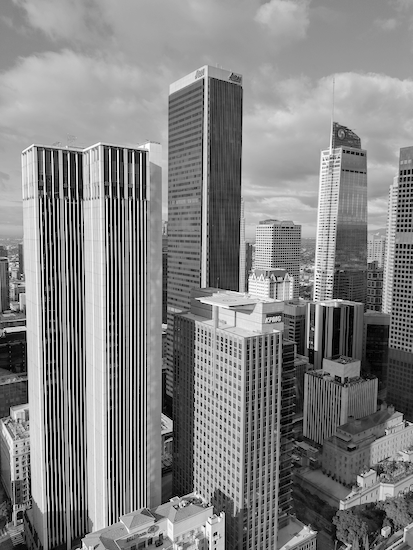

In [669]:
# Set gamma
gamma = .65
# Convert image to floats
image = image.astype(float)

# Normalize the image
image_n = image / np.max(image)

# Apply the gamma transformation
image_gamma_array = np.exp(np.log(image_n)*gamma)*np.max(image)

# Set the array as integers
image_gamma_array = image_gamma_array.astype(np.uint8)

# Convert array to image
image_gamma = Image.fromarray(image_gamma_array)
image_gamma.save('/Users/edenmolina/Documents/Image-Processing/Outputs/C5Gamma.png')
image_gamma

In [726]:
def FindOptimalGamma(image, lower, upper, steps = 100):
    Gammas = list()
    image_n = image/np.max(image)
    for i, j in enumerate(np.linspace(lower, upper, steps)):
        image_gamma_array = np.exp(np.log(image_n)*j)*np.max(image)
        Gammas.append(tuple((j, np.std(image_gamma_array))))

    GammasArray = np.array(Gammas)
    GammasArray[np.isnan(GammasArray)] = 0


    return (GammasArray[:,0][np.argmax(GammasArray[:,1])])

# Open an image an convert to greyscale and convert to an array
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png').convert('L'))
FindOptimalGamma(image, -5, 5, 100)
# Nums = list()
# for i in np.linspace(10,1000, 50):
#     Num = FindOptimalGamma(image, -5, 5, i)
#     Nums.append(tuple((i, Num)))
# Nums = np.array(Nums)
# plt.plot(Nums[:,0], Nums[:,1])



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


0.6565656565656566

# Testing on a colored image

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


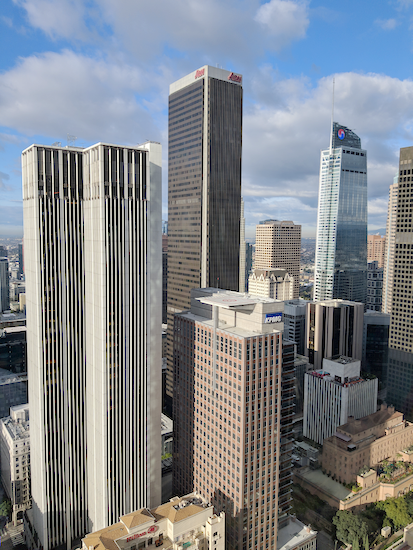

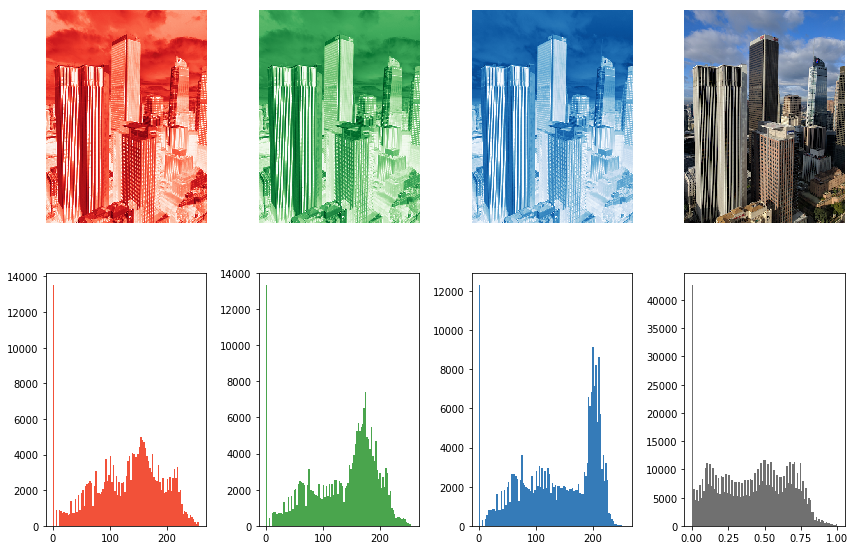

In [672]:
image = np.asarray(Image.open('/Users/edenmolina/Documents/Image-Processing/DTLA.png'))

image_n = image/np.max(image)

gamma = .65
# Apply the gamma transformation
image_gamma_array = np.exp(np.log(image_n)*gamma)*np.max(image)

# Separate the Channels
Reds = np.reshape(image_gamma_array[:,:,0], (image_gamma_array.shape[0], image_gamma_array.shape[1]))
Greens = np.reshape(image_gamma_array[:,:,1], (image_gamma_array.shape[0], image_gamma_array.shape[1]))
Blues = np.reshape(image_gamma_array[:,:,2], (image_gamma_array.shape[0], image_gamma_array.shape[1]))

# Max Values for each channel
Red_Max = np.max(Reds)
Greens_Max = np.max(Greens)
Blues_Max = np.max(Blues)

fig, ax = plt.subplots(2, 4, figsize = (12,8))
ax[0, 0].imshow(Reds, cmap = 'Reds')
ax[0, 0].axis('off')
ax[0, 1].imshow(Greens, cmap = 'Greens')
ax[0, 1].axis('off')
ax[0, 2].imshow(Blues, cmap = 'Blues')
ax[0, 2].axis('off')
ax[0, 3].imshow(image_n)
ax[0, 3].axis('off')

ax[1, 0].hist(Reds.flatten(), bins = 100, color = '#F25139')
ax[1, 1].hist(Greens.flatten(), bins = 100, color = '#4AA54D')
ax[1, 2].hist(Blues.flatten(), bins = 100, color = '#357BB8')
ax[1, 3].hist(image_n.flatten(), bins = 100, color = '#707070')
plt.tight_layout()

image_gamma_array = image_gamma_array.astype(np.uint8)

# Convert array to image
final = Image.fromarray(image_gamma_array, 'RGB')
final